### Шаг 1. Открытие файла с данными и изучение общей информации  <a id=first_look></a>

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
#настроим опцию отображения чисел с плавающей запятой
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
#откроем файлы с данными
path = '/datasets/gym_churn.csv'
gym_churn = pd.read_csv(path)

In [4]:
#напишем функцию для вывода общих данных
def general_info(df):
    print(df.info())
    display(df.describe())
    if len(df) <= 10:
        display(df)
    else:
        display(df.head())

In [5]:
#изучим общую информацию датасета gym_churn
general_info(gym_churn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


In [6]:
#проверим датасет на наличие дубликатов
gym_churn.duplicated().sum()

0

In [7]:
#переименуем столбцы
gym_churn.columns = [col.lower() for col in gym_churn.columns]
#проверка
gym_churn.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

### Вывод по этапу "Изучение общей информации"

На первый взгляд, данные в таблице готовы к анализу и обучению алгоритма: пропусков нет, типы данных в столбцах верные - числовые. Дополнительная проверка показала, что дубли также отсутствуют. Единственное, что можно было исправить перед дальнейшей работой - привести названия столбцов к нижнему регистру - что и было выполнено. Данные подготовлены к дальнейшей работе с ними.

### Шаг 2. Исследовательский анализ данных (EDA)  <a id=eda></a>

#### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения

In [8]:
#для оценки данных вызовем метод describe
gym_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


Как уже было указано выше, пропусков в данных нет. Что же касается средних значений и стандартных отклонений, то мы видим, что среди пользователей, данными о которых мы располагаем, мужчин и женщин примерно поровну (49% на 51%). 85% клиентов фитнес-центров живут или работают рядом с ними. Практически половина клиентов являются сотрудниками компаний-партнеров. Около 30% использовали промокод от друга при первом посещении финтес-центра. База данных содержит информацию о номере телефона 90% пользователей. Средний период действия абонемента равен 4,68 месяца. Лишь около 40% клиентов посещали групповые занятия. Средний возраст клиентов фитнес-клубов равен 29 годам, а 95% всех клиентов находятся в диапазоне от 23 до 36 лет. Средняя суммарная выручка от других услуг фитнес-центра составляет 146,94. Среднее число месяцев, оставшихся до конца срока действия абонемента, равно 4,32. Средний срок с начала первого обращения в фитнес-центр равен 3,72 месяца, а 95% всех клиентов находятся в диапазоне от 0 до 11,2 месяцев. Среднее количество посещений клубов в неделю равно 1,88, а 95% пользователей ходят в фитнес-клубы от 0 до 3,82 раз в неделю. За отчетный же месяц эти показатели равны 1,77 и от 0 до 3,87 соответственно. Наконец, 27% клиентов из выборки попали в отток.

#### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [9]:
#сгруппируем данные датасета по признаку оттока и посмотрим на средние значения признаков в группах
gym_churn.groupby('churn', as_index=False).mean()

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.51,0.87,0.53,0.35,0.90,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,1,0.51,0.77,0.36,0.18,0.90,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


Сгруппировав данные датасета по признаку оттока, мы увидели, что среди тех, кто прекратил посещать фитнес-центры, доля живущих или работающих рядом в клубами ниже, чем у тех, кто остался (77% против 87% соответственно). Также среди них меньше тех, кто является сотрудником компании-партнера (36% против 53%). Кроме того, меньше и тех, кто пришел по приглашению друга (18% против 35%). Средний срок действия абонемента у таких клиентов значительно меньше (1,73 месяцев против 5,75). Также эти пользователи меньше посещали групповые занятия (27% против 46%). Пользователи, попавшие в отток, младше, в среднем, на 3 года, совершали меньше дополнительных покупок (115,08 против 158,45), не так давно пришли в фитнес-центры - около месяца назад, совершали меньше посещений в неделю вцелом и за предыдущий месяц (1,47 против 2,02 и 1,04 против 2,03 соответственно).

#### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

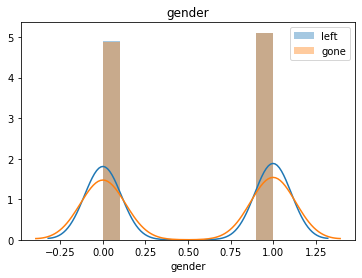

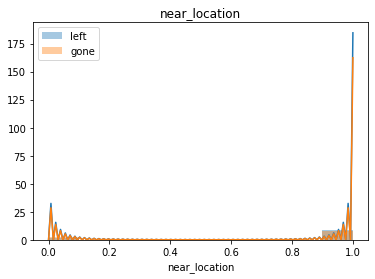

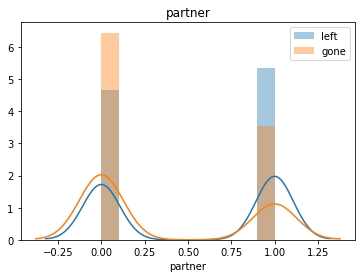

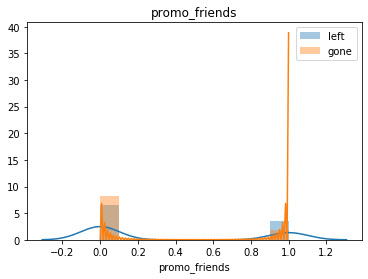

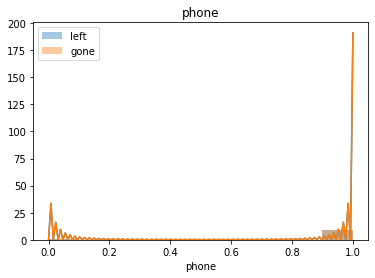

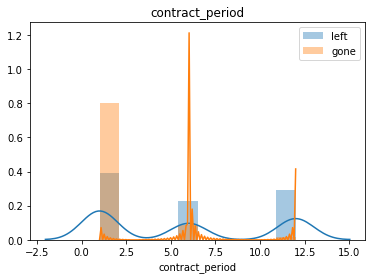

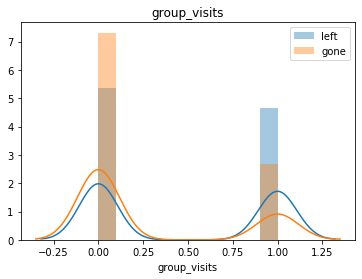

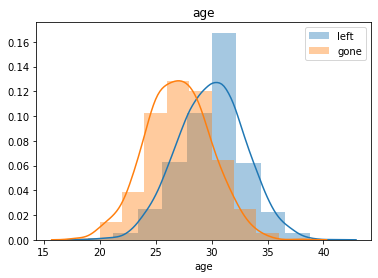

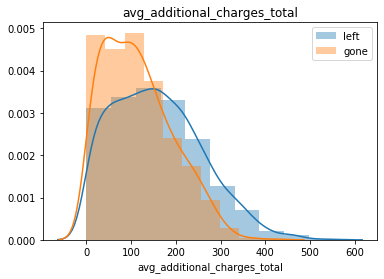

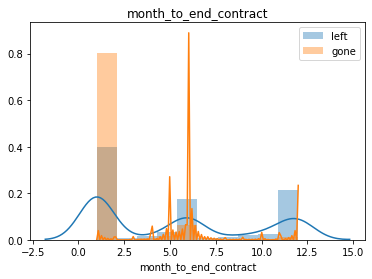

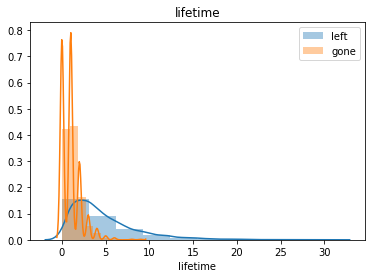

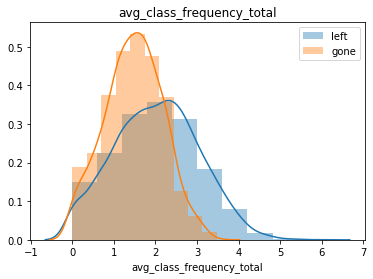

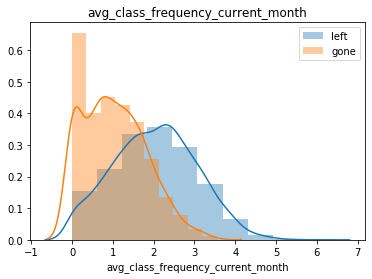

In [10]:
#построим графики распределения по группам
left = gym_churn.query('churn == 0')
gone = gym_churn.query('churn == 1')

for feature in gym_churn.columns:
    if feature == 'churn':
        continue
    else:
        sns.distplot(left[feature], label='left', bins=10)
        sns.distplot(gone[feature], label='gone', bins=10).set_title(feature)
        plt.legend()
        plt.show()

#### Постройте матрицу корреляций и отобразите её

Text(0.5, 1, 'Матрица корреляций признаков')

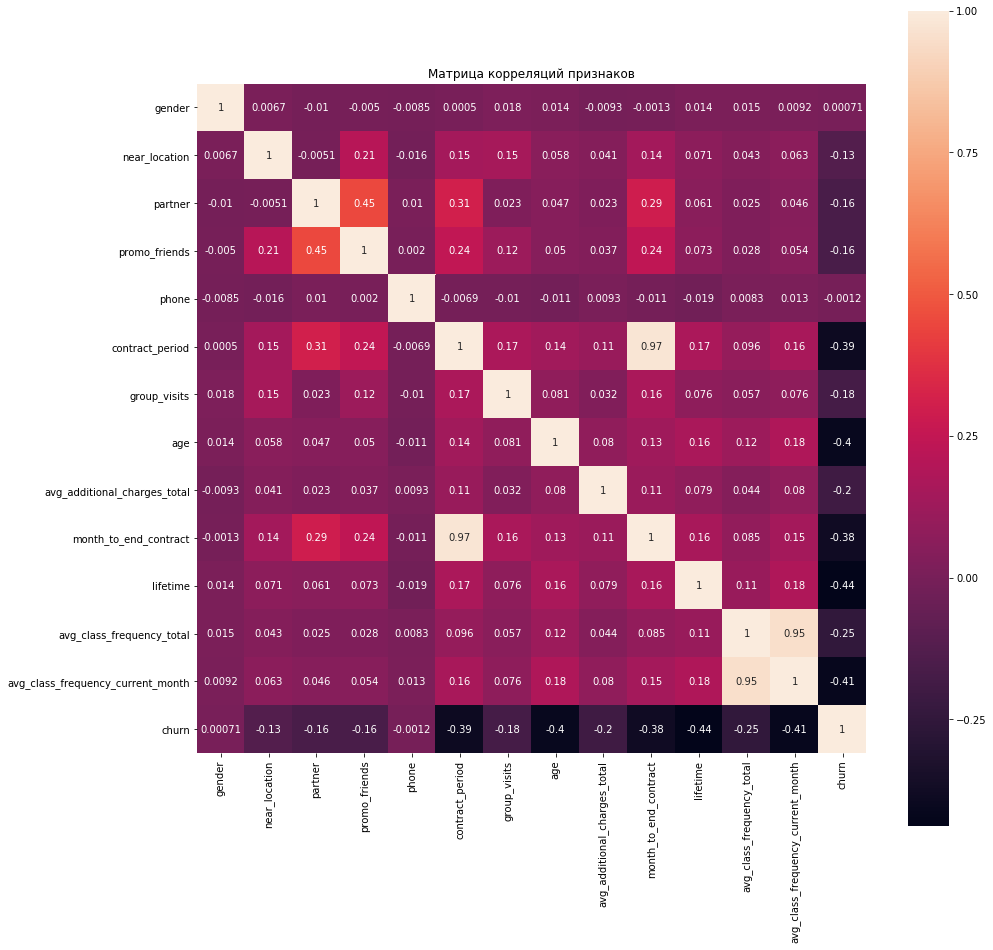

In [11]:
#построим матрицу корреляции
corr_m = gym_churn.corr()
#нарисуем heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_m, square=True, annot=True).set_title('Матрица корреляций признаков')

Построив и изучив матрицу корреляции признаков, мы увидели, что очень высокой взаимной прямой корреляцией (0,97) обладают признаки "срок действия абонемента" и "количество оставшихся месяцев до конца срока дейстивя абонемента". Это возможно в том случае, если фитнес-центры были открыты недавно, и практически все абонементы куплены в одно время. Кроме того, высокая взаимная прямая корреляция была обнаружена у "среднего количества посещений в неделю" и этого же параметра, но за предыдущий месяц - тут все ясно: посетители в большинстве своем не изменяли своим привычкам и в предыдущем месяце ходили в фитнес-клубы по заранее выбранному расписанию.

Наибольший же интерес вызывает целевая переменная и ее корреляция с признаками. Тут мы можем сказать, что на отток клиентов не влияют пол, близость жилья и работы, приглашение от работодателя или друга, факт посещения групповых занятий, траты на дополнительные услуги или среднее число посещений фитнес-центров. Однако средняя обратная корреляция была замечена со следующими признаками: "срок действия абонемента", "возраст", "число оставшихся до окончания срока действия абонемента месяцев", "срок с момента первого обращения в фитнес-центры" и "среднее число посещений фитнес-цетров за предыдущий месяц". Таким образом, мы можем предположить, что к попаданию в отток более склонны молодые клиенты с краткосрочными абонементами, пришедшие недавно и с истекающими сроками действия абонементов.

### Вывод по этапу "Исследовательский анализ данных"

Проанализировав исходные данные при помощи метода describe, мы увидели, что среди пользователей, данными о которых мы располагаем, мужчин и женщин примерно поровну (49% на 51%). 85% клиентов фитнес-центров живут или работают рядом с ними. Практически половина клиентов являются сотрудниками компаний-партнеров. Около 30% использовали промокод от друга при первом посещении финтес-центра. База данных содержит информацию о номере телефона 90% пользователей. Средний период действия абонемента равен 4,68 месяца. Лишь около 40% клиентов посещали групповые занятия. Средний возраст клиентов фитнес-клубов равен 29 годам, а 95% всех клиентов находятся в диапазоне от 23 до 36 лет. Средняя суммарная выручка от других услуг фитнес-центра составляет 146,94. Среднее число месяцев, оставшихся до конца срока действия абонемента, равно 4,32. Средний срок с начала первого обращения в фитнес-центр равен 3,72 месяца, а 95% всех клиентов находятся в диапазоне от 0 до 11,2 месяцев. Среднее количество посещений клубов в неделю равно 1,88, а 95% пользователей ходят в фитнес-клубы от 0 до 3,82 раз в неделю. За отчетный же месяц эти показатели равны 1,77 и от 0 до 3,87 соответственно. Наконец, 27% клиентов из выборки попали в отток.

Однако цель нашей работы заключается в прогнозе оттока клиентов, а значит, более интересны данные о посетителях в разрезе события "ушел/не ушел". В итоге, сгруппировав данные датасета по признаку оттока, мы увидели, что среди тех, кто прекратил посещать фитнес-центры, доля живущих или работающих рядом в клубами ниже, чем у тех, кто остался (77% против 87% соответственно). Также среди них меньше тех, кто является сотрудником компании-партнера (36% против 53%). Кроме того, меньше и тех, кто пришел по приглашению друга (18% против 35%). Средний срок действия абонемента у таких клиентов значительно меньше (1,73 месяцев против 5,75). Также эти пользователи меньше посещали групповые занятия (27% против 46%). Пользователи, попавшие в отток, младше, в среднем, на 3 года, совершали меньше дополнительных покупок (115,08 против 158,45), не так давно пришли в фитнес-центры - около месяца назад, совершали меньше посещений в неделю вцелом и за предыдущий месяц (1,47 против 2,02 и 1,04 против 2,03 соответственно).

Чтобы оценить возможную взаимосвязь признаков и целевой переменной, можно посмотреть на матрицу корреляции. Построив и изучив ее, мы увидели, что на отток клиентов не влияют пол, близость жилья и работы, приглашение от работодателя или друга, факт посещения групповых занятий, траты на дополнительные услуги или среднее число посещений фитнес-центров. Однако средняя обратная корреляция была замечена со следующими признаками: "срок действия абонемента", "возраст", "число оставшихся до окончания срока действия абонемента месяцев", "срок с момента первого обращения в фитнес-центры" и "среднее число посещений фитнес-цетров за предыдущий месяц". Таким образом, мы можем предположить, что к попаданию в отток более склонны молодые клиенты с краткосрочными абонементами, пришедшие недавно и с истекающими сроками действия абонементов.

### Шаг 3. Построение модели прогнозирования оттока пользователей  <a id=model></a>

In [12]:
#разделим данные на признаки и целевую переменную
X = gym_churn.drop('churn', axis=1)
y = gym_churn['churn']
#разделим модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [13]:
#обучим модель логистической регрессии и оценим целевые метрики
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

print('Accuracy of Logistic Regression: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision of Logistic Regression: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall of Logistic Regression: {:.2f}'.format(recall_score(y_test, lr_predictions)))

Accuracy of Logistic Regression: 0.93
Precision of Logistic Regression: 0.89
Recall of Logistic Regression: 0.84


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
#обучим модель случайного леса и оценим целевые метрики
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

print('Accuracy of Random Forest: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision of Random Forest: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall of Random Forest: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Accuracy of Random Forest: 0.92
Precision of Random Forest: 0.88
Recall of Random Forest: 0.83


### Вывод по этапу "Построение модели прогнозирования оттока пользователей"

Согласно плану работы мы разделили данные на обучающую и валидационную выборки и обучили модель двумя способами: логистической регрессией и случайным лесом. Результат обучения моделей в обоих случаях мы оценили по следующим метрикам: доля правильных ответов (accuracy), точность (precision) и полнота (recall). Таким образом, мы смогли сравнить результаты обеих моделей и выбрать более точную: логистическая регрессия оказалась на 1-2% лучше случайного леса по всем трем метрикам.

### Шаг 4. Кластеризация пользователей  <a id=clasterization></a>

In [15]:
#стандартизируем данные перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

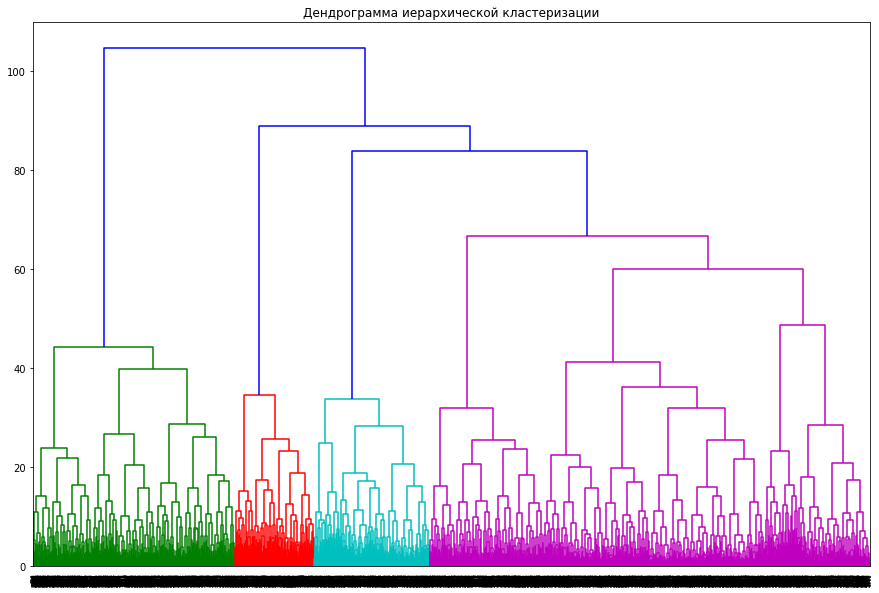

In [16]:
#построим матрицу расстояний
linked = linkage(X_sc, method = 'ward')
#построим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма иерархической кластеризации')
plt.show()

In [17]:
#обучим модель кластеризации на основании алгоритма K-Means
km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)
#сохраним метки кластера в поле нашего датасета
gym_churn['cluster_km'] = labels
#выведем статистику по средним значениям наших признаков по кластеру
gym_churn_grouped = gym_churn.groupby('cluster_km', as_index=False).mean()
gym_churn_grouped

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.50,0.00,0.46,0.08,1.00,2.38,0.22,28.48,135.63,2.22,2.81,1.66,1.48,0.44
1,1,0.50,0.96,0.78,0.57,1.00,10.88,0.54,29.98,160.82,9.94,4.72,2.00,1.99,0.03
2,2,0.52,0.86,0.47,0.31,0.00,4.78,0.43,29.30,144.21,4.47,3.94,1.85,1.72,0.27
3,3,0.49,1.00,0.35,0.24,1.00,1.96,0.34,28.16,130.76,1.87,2.38,1.24,1.00,0.52
4,4,0.56,0.98,0.35,0.23,1.00,2.58,0.47,30.11,162.06,2.38,4.95,2.82,2.81,0.07


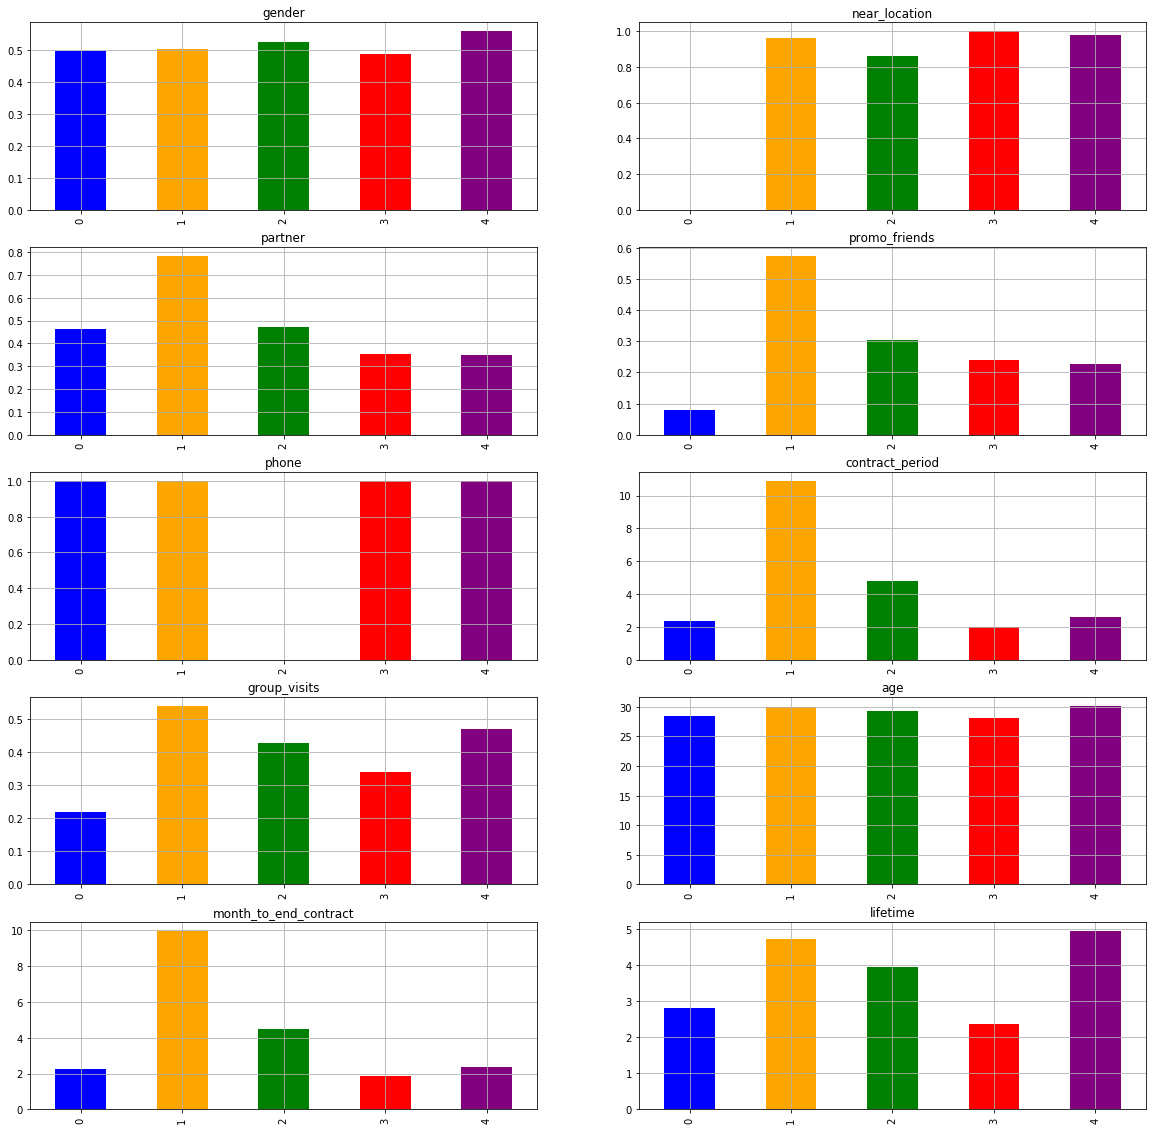

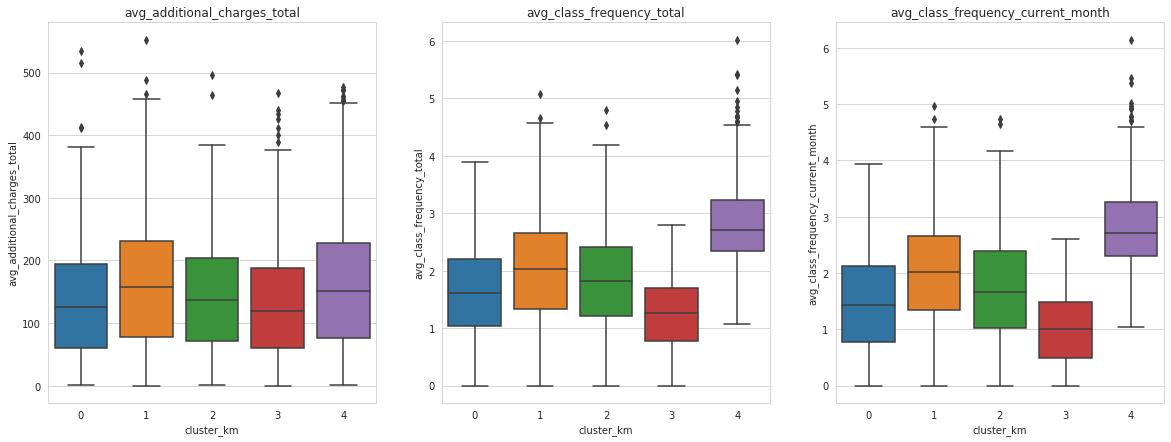

In [18]:
#разделим признаки на два списка: "логические/дискретные" и "непрерывные"
logical_discrete_features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period',
                             'group_visits', 'age', 'month_to_end_contract', 'lifetime']
continuous_features = ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
#построим гистограммы логических и дискретных признаков
plt.subplots(figsize=(20,20))
i=1
for feature in logical_discrete_features:
    gym_churn_grouped[feature]\
        .plot(kind = 'bar', x = feature, grid=True, color=['blue','orange','green','red','purple'], ax=plt.subplot(5,2,i))\
        .set_title(feature)
    i += 1
plt.show()
#построим боксплоты непрерывных признаков
plt.subplots(figsize=(20,7))
sns.set_style('whitegrid')
i=131
for feature in continuous_features:
    sns.boxplot(x='cluster_km', y=feature, data=gym_churn, ax=plt.subplot(i)).set_title(feature)
    i += 1
plt.show()

In [19]:
#посчитаем долю оттока по кластерам
gym_churn.groupby('cluster_km',as_index=False).agg({'churn':'mean'})

,cluster_km,churn
0,0,0.44
1,1,0.03
2,2,0.27
3,3,0.52
4,4,0.07


### Выводы по этапу "Кластеризация пользователей"

Используя стандартизированную матрицу признаков, мы построили матрицу расстояний и визуализировали ее в виде дендрограммы, на основании которой предположили, что в данных можно выделить четыре кластера.

Далее мы обучили модель кластеризации на основании алгоритма K-Means и спрогнозировали кластеры клиентов, установив число кластеров равным пяти.

Сгруппировав данные по кластерам, мы обнаружили, что в первом кластере были собраны клиенты, живущие или работающие рядом с финтнес-центрами (100%), пришедшие недавно (около 2,5 месяцев), с короткими по продолжительности абонементами (в среднем, около 2 месяцев) и редко посещающие фитнес-клубы (в среднем, чуть более раза в неделю). Как результат, в этом кластере высокая доля оттока - 51%.

Второй кластер выделяется, в первую очередь, продолжительными абонементами - в среднем, почти 11 месяцев. В итоге, отток клиентов в этом кластере самый низкий - 3%.

Третий кластер собрал клиентов, посещающих финтес-клубы чаще всего - в среднем, 2,85 раз в неделю. Такие посетители уходят редко - всего в 7% случаев.

В четвертом кластере оказались клиенты, живущие и работающие в отдалении от фитнес-центров и посещающие клубы в среднем 1,66 раз в неделю. Отток клиентов в этом кластере довольно высокий и составляет 44%.

Пятый кластер выделяется тем, что клиенты в нем не оставили телефонный номер. Несмотря на это, они имеют продолжительные абонементы (в среднем, 4,79 месяцев) и, вцелом, активно их используют. Тем не менее, отток в этом кластере составляет 27%.

###  Шаг 5. Выводы и базовые рекомендации по работе с клиентами <a id=conclusion></a>

В ходе работы над проектом мы изучили исходные данные и выяснили, что 27% клиентов из выборки попали в отток.

Сгруппировав данные по признаку оттока, мы увидели, что среди тех, кто прекратил посещать фитнес-центры, доля живущих или работающих рядом в клубами ниже, чем у тех, кто остался (77% против 87% соответственно). Также среди них меньше тех, кто является сотрудником компании-партнера (36% против 53%). Кроме того, меньше и тех, кто пришел по приглашению друга (18% против 35%). Средний срок действия абонемента у таких клиентов значительно меньше (1,73 месяцев против 5,75). Также эти пользователи меньше посещали групповые занятия (27% против 46%). Пользователи, попавшие в отток, младше, в среднем, на 3 года, совершали меньше дополнительных покупок (115,08 против 158,45), не так давно пришли в фитнес-центры - около месяца назад, совершали меньше посещений в неделю вцелом и за предыдущий месяц (1,47 против 2,02 и 1,04 против 2,03 соответственно).

Чтобы оценить возможную взаимосвязь признаков и целевой переменной, можно посмотреть на матрицу корреляции. Построив и изучив ее, мы увидели, что на отток клиентов не влияют пол, близость жилья и работы, приглашение от работодателя или друга, факт посещения групповых занятий, траты на дополнительные услуги или среднее число посещений фитнес-центров. Однако средняя обратная корреляция была замечена со следующими признаками: "срок действия абонемента", "возраст", "число оставшихся до окончания срока действия абонемента месяцев", "срок с момента первого обращения в фитнес-центры" и "среднее число посещений фитнес-цетров за предыдущий месяц". Таким образом, мы можем предположить, что к попаданию в отток более склонны молодые клиенты с краткосрочными абонементами, пришедшие недавно и с истекающими сроками действия абонементов.

Далее согласно плану работы мы разделили данные на обучающую и валидационную выборки и обучили модель двумя способами: логистической регрессией и случайным лесом. Результат обучения моделей в обоих случаях мы оценили по следующим метрикам: доля правильных ответов (accuracy), точность (precision) и полнота (recall). Таким образом, мы смогли сравнить результаты обеих моделей и выбрать более точную: логистическая регрессия оказалась на 1-2% лучше случайного леса по всем трем метрикам.

Затем, используя стандартизированную матрицу признаков, мы построили матрицу расстояний и визуализировали ее в виде дендрограммы, на основании которой предположили, что в данных можно выделить четыре кластера. Однако после этого для дальнейшей работы мы обучили модель кластеризации на основании алгоритма K-Means и спрогнозировали кластеры клиентов, установив число кластеров равным пяти.

В итоге, сгруппировав данные по кластерам, мы обнаружили, что во втором и третьем кластерах отток наименьший и составляет 3% и 7% соответственно. Отличительными особенностями данных кластеров являются продолжительные абонементы (в среднем, почти 11 месяцев) и высокая частота посещений фитнес-центров (в среднем, 2,85 раз в неделю). Таким образом, мы можем сказать, что посетители, приобретающие абонемент сразу на год и/или посещающие фитнес-клубы 2-3 раза в неделю, менее склонны к попаданию в отток.

В оставшихся кластерах проблема оттока стоит более остро, ведь данный показатель достигает в них уровня в 27-51%. Эти кластеры примечательны тем, что в них собрались клиенты которые: либо посещают фитнес-клубы довольно редко (в среднем, чуть более раза в неделю), либо не живут/не работают поблизости с фитнес-клубами, либо не оставили в анкете свой номер телефона.

Таким образом, на наш взгляд, уменьшить отток клиентов можно, осуществив следующие шаги:
- При регистрации нового клиента обязательно заполнять поле с номером телефона, а в случае действующих клиентов - стимулировать их сообщить этот контакт администрации. Побудить клиентов к этому можно, либо в принудительном порядке (плохая идея), либо через участие в маркетинговой акции, например, розыгрыше абонементов и сертификатов на услуги фитнес-центров (хорошая идея). Через телефонные рассылки можно не только удерживать текущих клиентов, но и возращать прежних, а кроме того, заполнение номеров даст возможность улучшить прогнозную модель.
- Скорректировать стоимость абонементов таким образом, чтобы покупка месячного/трехмесячного абонемента выглядела в глазах потенциального клиента менее рентабельной покупкой, нежели абонемент на более длительный срок. В итоге, мысль о переплаченных деньгах будет стимулировать клиента к возвращению в фитнес-клуб. К тому же, более продолжительные регулярные занятия чаще приводят к желаемому результату, а значит, клиент будет доволен и с большим шансом продлит абонемент.
- Проведение востребованных бесплатных групповых занятий на регулярной основе также позволит снизить отток за счет увеличения средней посещаемости клубов в неделю.
- Наконец, мы видим, что довольно остро стоит проблема удаленности фитнес-клубов от мест жительства и работы клиентов: клиент легко может устать долго добираться до клуба и предпочесть клуб-конкурент или вообще оставить данную затею. Поэтому стоит продумать дальнейшую стратегию развития сети: открытие клубов в каких местах позволит новым и текущим клиентам не тратить лишние время и силы на дорогу в фитнес-клуб.